In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import math

## Histogram Equalization

In [5]:
def main():
    gray_image = cv2.imread("car.jpg")  
    image = cv2.cvtColor(gray_image,cv2.COLOR_BGR2GRAY)
    print(gray_image.shape)
    print(image.shape)
    cv2.imshow('Weighted grayscale image',gray_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    sys.exit()
 
main()

(420, 1024, 3)
(420, 1024)


SystemExit: 

C:\Users\jctep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
def histogram_eq(img):
    image = cv2.imread(img)
    or_image = cv2.imread(img)
    cv2.imshow("Original Image",or_image)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cv2.imshow("",image)
    height = image.shape[0]
    width = image.shape[1]
    #image_shape = image.shape()

    
    ####gray_scale histogram####
    gray_scale_counts, gray_scale_bins = np.histogram(image, range(256))
    plt.bar(gray_scale_bins[:-1] - 0.5, gray_scale_counts, width=1, edgecolor='none',color ='gray')
    plt.axvline(image.mean(), color='k', linestyle='dashed', linewidth=2)
    plt.xlim([-0.5, 255.5])
    plt.title("Weighted Grayscale Channel Histogram")
    plt.show()
    
    
    counts, bins = np.histogram(image, bins = np.arange(0,256))
    cdf_un = np.cumsum(counts, dtype=float)
    cdf=cdf_un/np.amax(cdf_un)
    out = np.zeros((height,width,1))
    
    for i in range(0,height):
        for j in range(0,width):
            pixel = image[i,j]
            if pixel == 255:
                out[i,j] = 255
            else:
                
            #print(pixel)
                out[i,j] = round(255*cdf[pixel],0)
            #out[i,j] = 255*cdf[pixel]
            #out[i,j]= np.where(pixel==255,np.multiply(255,1),np.multiply(255,cdf[pixel]))
     
    
     ####equalized histogram####
    out_scale_counts, out_scale_bins = np.histogram(out, range(256))
    plt.bar(out_scale_bins[:-1] - 0.5, out_scale_counts, width=1, edgecolor='none',color ='gray')
    plt.axvline(out.mean(), color='k', linestyle='dashed', linewidth=2)
    plt.xlim([-0.5, 255.5])
    plt.title("Equalized Channel Histogram")
    plt.show()
    
    
    
    cv2.imwrite("g.jpg",out)
    gray_image = cv2.imread("g.jpg")     
    cv2.imshow('Equalized image',gray_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    sys.exit()
    
            
            

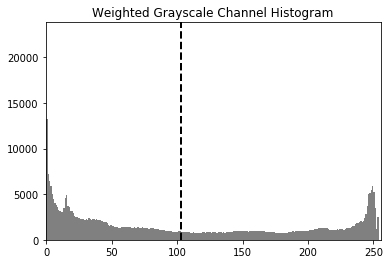

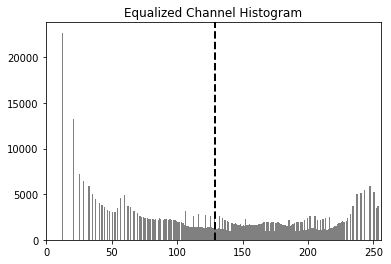

SystemExit: 

C:\Users\jctep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
histogram_eq("car.jpg")

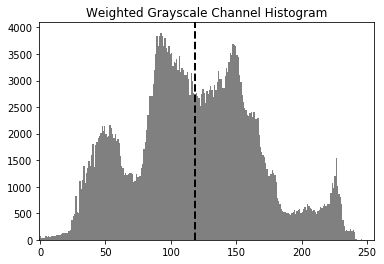

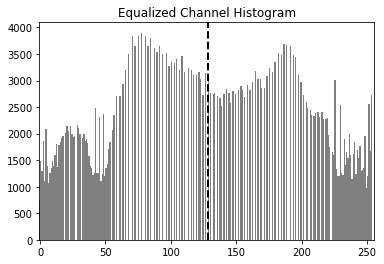

In [36]:
histogram_eq("atitlan.jpg")

In [3]:
cdf[255]

NameError: name 'cdf' is not defined

## Algoritmo de Canny

In [36]:
def derivadaX(img):
    image = cv2.imread(img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    height = image.shape[0]
    width = image.shape[1]
    out = np.zeros((height,width,1))
    
    for i in range(0,height - 1):
        for j in range(0,width):
            out[i,j] = image[i+1,j] - image[i,j]
    
    return(out)
            
            

In [37]:
derivadaX("atitlan.jpg")

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


array([[[  1.],
        [  1.],
        [  1.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  1.],
        [  1.],
        [  1.]],

       [[  1.],
        [  1.],
        [  1.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       ...,

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [254.],
        [254.],
        [254.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]]])

In [38]:
def derivadaY(img):
    image = cv2.imread(img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    height = image.shape[0]
    width = image.shape[1]
    out = np.zeros((height,width,1))
    
    for i in range(0,height):
        for j in range(0,width-1):
            out[i,j] = image[i,j+1] - image[i,j]
    
    return(out)
            
            

In [39]:
derivadaY("atitlan.jpg")

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

In [40]:
def gradient(derX,derY):
    gradient = np.sqrt(derX**2 + derY**2)
    return gradient

In [42]:
dX = derivadaX("atitlan.jpg")
dY = derivadaY("atitlan.jpg")
gradient(np.sqrt(5),np.sqrt(20))

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


5.0

In [51]:
def phase(derX,derY):
    height = derX.shape[0]
    width = derY.shape[1]
    out = np.zeros((height,width,1))
    
    for i in range(0,height):
        for j in range(0,width):
            out[i,j] = np.where(
                math.atan2(derX[i,j],derY[i,j])*(180/np.pi)<0,
                math.atan2(derX[i,j],derY[i,j])*(180/np.pi)+360,
                math.atan2(derX[i,j],derY[i,j])*(180/np.pi)
            )
    return out

In [53]:
np.max(phase(dX,dY))

90.0

## Non Maximun Suppresion 

In [2]:
np.arange(256)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [31]:
for i in range(1,4):
    print(i)

1
2
3
